In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
infile = open("resultaten_3drempels.txt")

In [19]:
data=infile.readlines()


In [20]:
data=[i.split("\n")[0] for i in data if i != "\n"]

In [21]:
#bij andere speedbumps dan {50,40,30,20,10} moet je ze toevoegen in deze dict
dict_resultaten={"50":{},"40":{},"30":{},"20":{},"10":{}}

In [22]:
for i in range(0,len(data),3):
    dict_resultaten[data[i]][int(data[i+1])]=float(data[i+2])



In [23]:
# lines
lines=dict_resultaten.keys()
lines

dict_keys(['50', '40', '30', '20', '10'])

In [24]:
# x
x_lst=[i.keys() for i in list(dict_resultaten.values())]
x_lst

[dict_keys([2, 3, 4, 5, 6, 7, 8]),
 dict_keys([2, 3, 4, 5, 6, 7, 8]),
 dict_keys([2, 3, 4, 5, 6, 7, 8]),
 dict_keys([2, 3, 4, 5, 6, 7, 8]),
 dict_keys([2, 3, 4, 5, 6, 7, 8])]

In [45]:
# y
y_lst=[[z*100 for z in j] for j in list([i.values() for i in list(dict_resultaten.values())])]
y_lst
for i in y_lst:
    print(i)

[98.0, 90.8, 70.8, 23.599999999999998, 16.2, 19.0, 16.8]
[98.2, 88.6, 21.2, 16.2, 16.0, 19.400000000000002, 17.8]
[25.6, 14.2, 4.3999999999999995, 4.8, 1.7999999999999998, 2.6, 2.0]
[17.4, 12.2, 8.4, 4.6, 2.1999999999999997, 0.8, 0.0]
[19.2, 13.0, 5.6000000000000005, 4.0, 1.4000000000000001, 0.2, 0.6]


In [26]:
z_score=1.96
n=500

In [27]:
error= [[z_score*np.sqrt((i/100)*(1-(i/100))/n) * 100 for i in y] for y in y_lst]

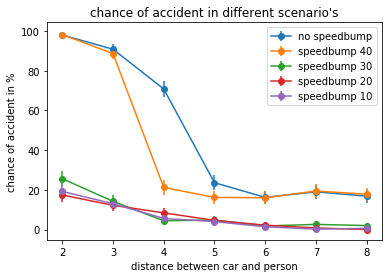

In [28]:
for i in range(len(x_lst)):
    plt.errorbar(x_lst[i],y_lst[i],error[i],fmt="o-")
speedbumps=["no speedbump", "speedbump 40", "speedbump 30", "speedbump 20", "speedbump 10"] 
plt.legend(speedbumps)
plt.xlabel("distance between car and person")
plt.ylabel("chance of accident in %")
plt.title("chance of accident in different scenario's")
plt.show()

<h4>average chance accident</h4>

In [29]:
x=speedbumps
average_chance=[np.mean(i) for i in y_lst]
y=average_chance

Text(0, 0.5, 'average chance accident')

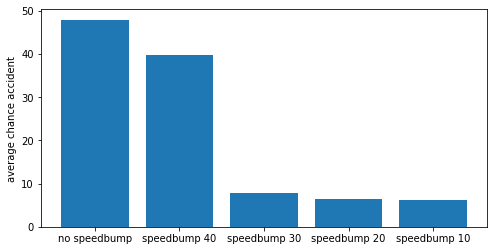

In [40]:
plt.figure(figsize=(8,4))
plt.bar(x, y)

plt.ylabel("average chance accident")

Given these graphs a speedbump which lowers the speed to 30 will be advised. Now we calculate the reliability of our test. We can't influence the distance between the car and the person, therefore we assume the distance is a random integer between 2 and 8.

standaarddeviatie rondom gemiddelde populatie = standaarddeviatie steekproeven / wortel n<br>pˆ±1.96 * √(pˆ(1−pˆ)/n)

In [31]:
z_score=1.96
n=500

In [32]:
error= [z_score*np.sqrt((i/100)*(1-(i/100))/n) * 100 for i in y]
error

[4.378773176130501,
 4.287370386612288,
 2.3663177538107596,
 2.1631024830090695,
 2.1274104446486106]

Text(0, 0.5, 'average chance accident in %')

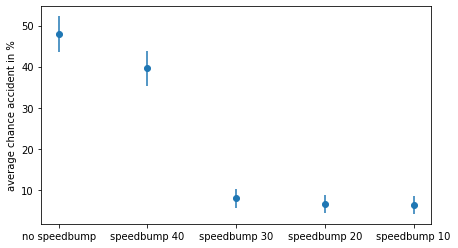

In [43]:
plt.figure(figsize=(7,4))
plt.errorbar(x, y, yerr=error, fmt='o')
plt.ylabel("average chance accident in %")


In [34]:
y

[47.88571428571429,
 39.628571428571426,
 7.914285714285713,
 6.514285714285714,
 6.2857142857142865]

In [44]:
error

[4.378773176130501,
 4.287370386612288,
 2.3663177538107596,
 2.1631024830090695,
 2.1274104446486106]